In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates

EV = pd.read_csv("Data.csv", sep=';')

# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data.csv", sep=";")
EV = EV.iloc[:, :33]
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
#data['Start date'] = pd.to_datetime(data['Start date'], format='%m/%d/%Y', errors='coerce')
EV['Start date'] = pd.to_datetime(EV['Start date'].str.split('|').str[0].str.strip(), format='%m/%d/%Y', errors='coerce')
print("Data.csv antes:")
print(EV.head())


# Carregar os dados do arquivo PLUS.csv
plus = pd.read_csv("PLUS.csv", sep=";")
plus = plus.drop(columns=['Unnamed: 2'])
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')

print("\nPLUS.csv antes:")
print(plus.head())

# Mesclar os dois DataFrames usando as colunas de data corretas
merged_data = pd.merge_asof(EV.sort_values('Start date'), plus.sort_values('Date'), left_on='Start date', right_on='Date', direction='nearest')

merged_data = merged_data.drop(columns=['Date'])

# Salvar o resultado no arquivo Data_merged.csv
merged_data.to_csv("Data_merged.csv", index=False, sep=";")
print("\nData.csv após a mesclagem:")
print(merged_data.head())


# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data_merged.csv", sep=";")
EV2 = pd.read_csv("Data.csv", sep=";")

EV['Start date'] = EV2['Start date']

# Convert strings to float
EV['Duration (min)'] = EV['Duration (min)'].str.replace(',', '.').astype(float)
EV['Total Energy (kWh)'] = EV['Total Energy (kWh)'].str.replace(',', '.').astype(float)
EV['Temp'] = EV['Temp'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Plus'] = EV['Plus'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
EV['Stop date'] = pd.to_datetime(EV['Stop date'], format='%m/%d/%Y | %H:%M')

# Crie uma nova coluna 'Period of Day' com base na hora
EV['Period of Day'] = pd.cut(EV['Start date'].dt.hour, bins=[0, 12, 18, 24], labels=['Manhã', 'Tarde', 'Noite'])

# Adicione a coluna 'Day of Week'
EV['Day of Week'] = EV['Start date'].dt.day_name()

# Crie uma nova coluna 'Season' com base no mês (usando o hemisfério norte como referência)
EV['Month'] = EV['Start date'].dt.month
EV['Season'] = EV['Month'].apply(lambda x: 'Inverno' if x in [1, 2, 12] else ('Primavera' if x in [3, 4, 5] else ('Verão' if x in [6, 7, 8] else 'Outono')))

# Crie uma nova coluna 'Período Escolar' com base no mês
EV['Período Escolar'] = EV['Month'].apply(lambda x: 'Férias' if x in [7, 8] else 'Período Escolar')

# Mapeando categorias para números
period_of_day_mapping = {'Manhã': 1, 'Tarde': 2, 'Noite': 3}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
season_mapping = {'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4}
periodo_escolar_mapping = {'Férias': 1, 'Período Escolar': 2}

EV['Period of Day'] = EV['Period of Day'].map(period_of_day_mapping)
EV['Day of Week'] = EV['Day of Week'].map(day_of_week_mapping)
EV['Season'] = EV['Season'].map(season_mapping)
EV['Período Escolar'] = EV['Período Escolar'].map(periodo_escolar_mapping)

X = EV[['Duration (min)', 'Total Energy (kWh)','Temp', 'Plus', 'Period of Day', 'Day of Week', 'Month',  'Season', 'Período Escolar' ]]
X.info()

Data.csv antes:
  Start date           Stop date Network          Fleet report_ev   Group  \
0 2023-05-31  05/31/2023 | 19:08    EVIO  Frota Capwatt  AA-99-AA  Others   
1 2023-05-31  05/31/2023 | 13:46    EVIO  Frota Capwatt  AA-99-AA  Others   
2 2023-05-30  05/30/2023 | 13:29    EVIO  Frota Capwatt  AA-99-AA  Others   
3 2023-05-26  05/26/2023 | 19:13    EVIO  Frota Capwatt  AA-99-AA  Others   
4 2023-05-24  05/24/2023 | 19:17    EVIO  Frota Capwatt  AA-99-AA  Others   

         User   Charging Station     City Duration (min)  ...  \
0  José Silva  CAP_SON_MAI_00010  Moreira        321,983  ...   
1  José Silva  CAP_SON_MAI_00010  Moreira            0,1  ...   
2  José Silva  CAP_SON_MAI_00004     Maia          237,1  ...   
3  José Silva  CAP_SON_MAI_00002     Maia          22,55  ...   
4  José Silva  CAP_SON_MAI_00002     Maia           35,3  ...   

  MOBIE TAR total (€) MOBIE CPO total (€)  MOBIE E-mobility support (€)  \
0                   -                   -              

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_16612\1821807611.py:28: UserWarning: Parsing '13.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_16612\1821807611.py:28: UserWarning: Parsing '14.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_16612\1821807611.py:28: UserWarning: Parsing '15.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_16612\1821807611.py:28: UserWarning: Parsing '16.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Duration (min)      117 non-null    float64 
 1   Total Energy (kWh)  117 non-null    float64 
 2   Temp                117 non-null    float64 
 3   Plus                117 non-null    float64 
 4   Period of Day       117 non-null    category
 5   Day of Week         117 non-null    int64   
 6   Month               117 non-null    int64   
 7   Season              117 non-null    int64   
 8   Período Escolar     117 non-null    int64   
dtypes: category(1), float64(4), int64(4)
memory usage: 7.7 KB


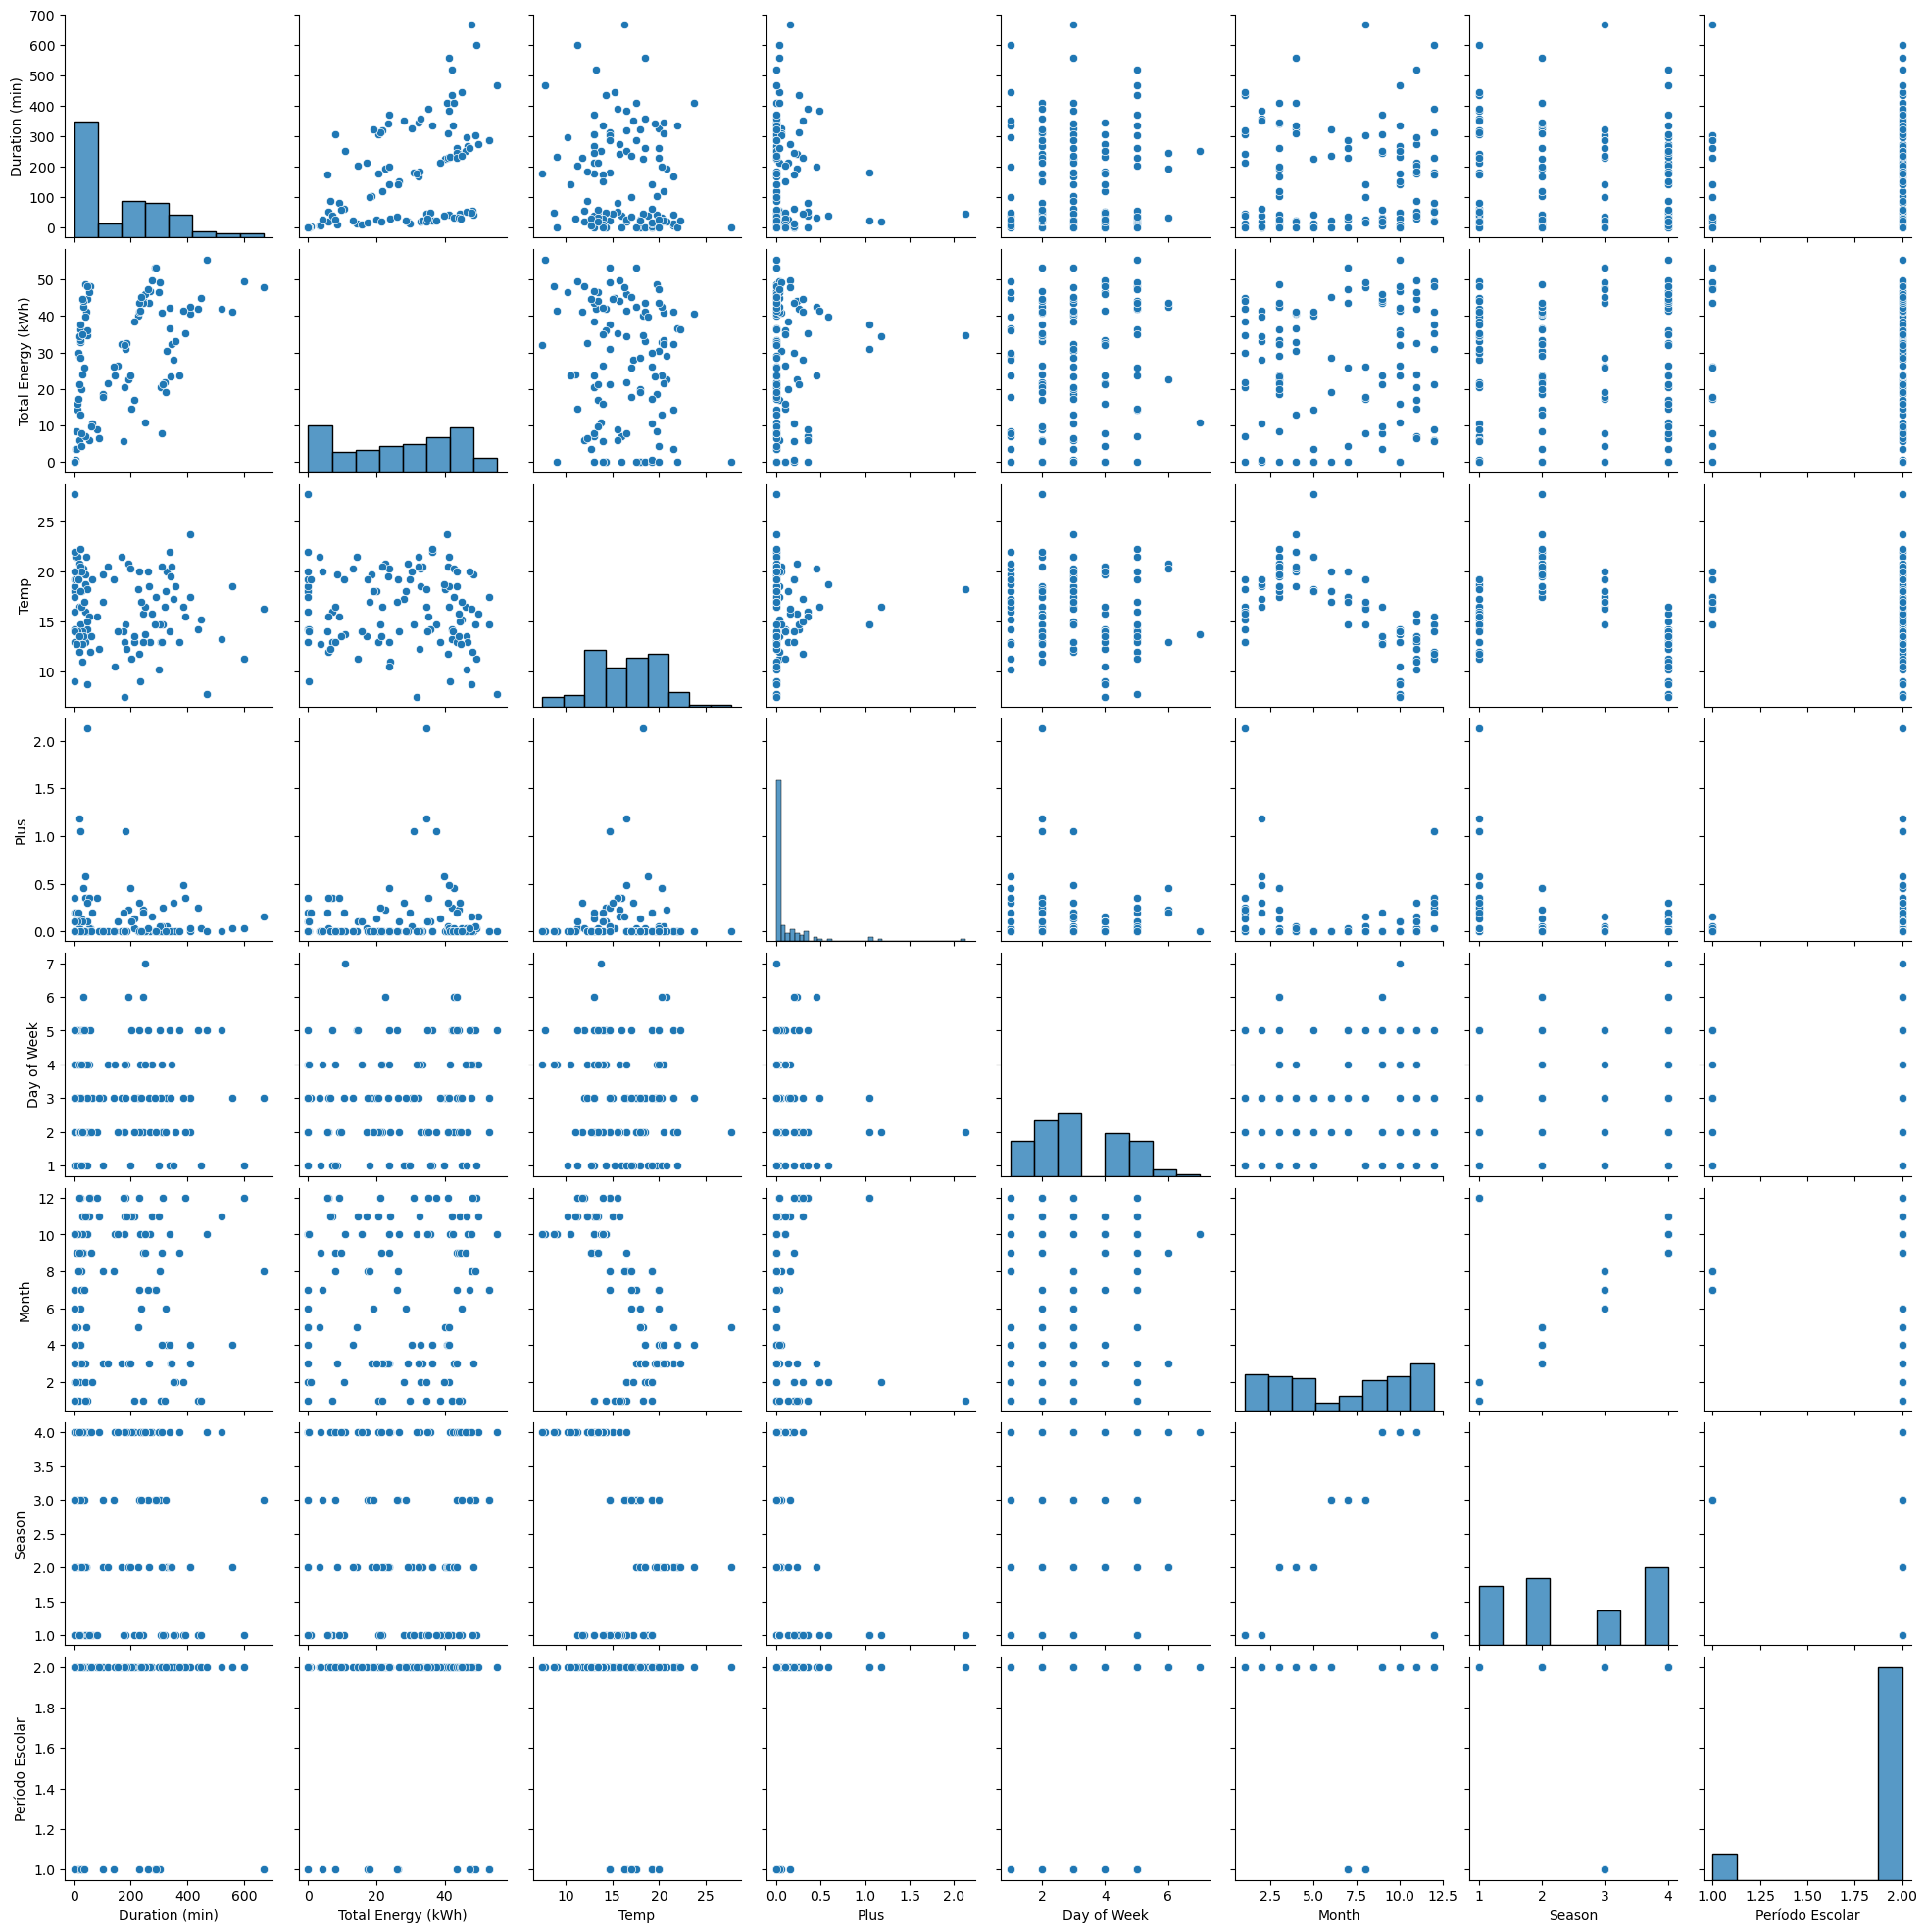

In [23]:
#X = EV[['Duration (min)', 'Total Energy (kWh)', 'Period of Day', 'Day of Week', 'Month',  'Season', 'Período Escolar' ]]
X = EV[['Duration (min)', 'Total Energy (kWh)','Temp', 'Plus', 'Period of Day', 'Day of Week', 'Month',  'Season', 'Período Escolar' ]]
X.info()

#Crie um pair plot usando seaborn
sns.pairplot(X)
plt.show()

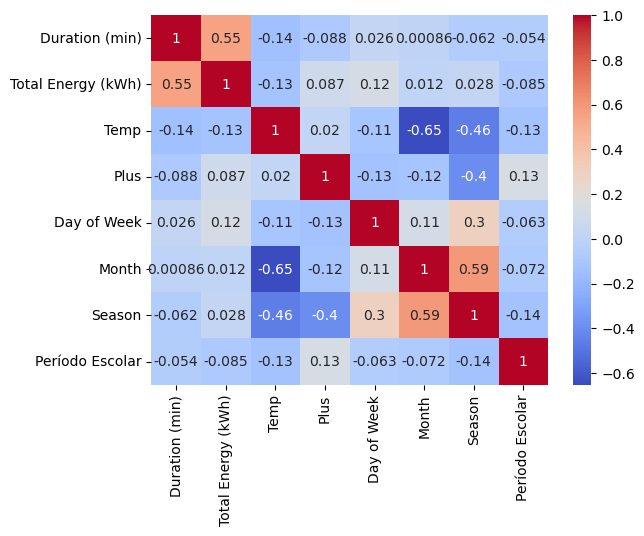

In [24]:
# Matriz de Correlação
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_16612\2115989458.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X_kmeans)


         count       mean        std    min      25%     50%     75%    max
Cluster                                                                    
0         52.0  24.435365  16.100618   0.00  10.1025  28.310  40.295  48.61
1          5.0  35.574000   3.342885  31.04  34.5600  34.800  37.610  39.86
2         21.0  22.021429  16.789628   0.00   6.6300  20.520  35.950  49.44
3         26.0  29.618500  18.246637   0.00  14.9225  33.755  44.495  55.51
4         13.0  30.329231  19.637206   0.00  17.3500  26.260  48.000  53.18


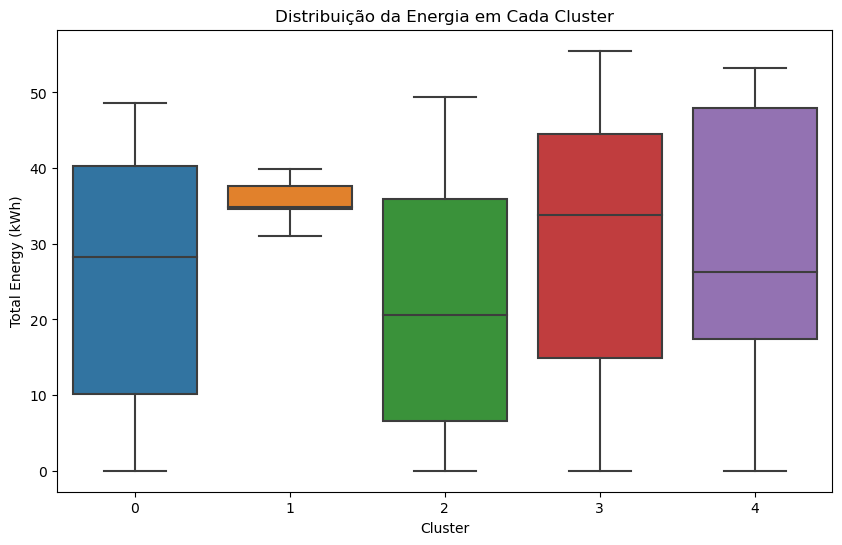

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecionar as variáveis para o modelo K-Means
X = EV[['Total Energy (kWh)','Temp', 'Plus', 'Period of Day', 'Day of Week', 'Month',  'Season', 'Período Escolar' ]]

# Normalização dos dados
scaler = StandardScaler()
X_kmeans = scaler.fit_transform(X)

# Escolha do número de clusters 
num_clusters = 5

# Aplicação do K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_kmeans)

# Obter estatísticas descritivas para cada cluster
cluster_stats = X.groupby('Cluster')['Total Energy (kWh)'].describe()
print(cluster_stats)

# Crie um boxplot para visualizar a distribuição da energia em cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total Energy (kWh)', data=X)
plt.title('Distribuição da Energia em Cada Cluster')
plt.show()

In [31]:
# Defina os quantis desejados 
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

# Agrupa por 'Cluster' e calcula os quantis para a coluna de energia
quantiles_by_cluster = X.groupby('Cluster')['Total Energy (kWh)'].quantile(quantiles).unstack()

# Visualiza os quantis para cada cluster
#print(quantiles_by_cluster)
print()

# Calcula a distribuição percentual dos clusters para cada dia da semana
cluster_distribution = X.groupby('Day of Week')['Cluster'].value_counts(normalize=True).unstack() * 100

# Visualiza a distribuição percentual dos clusters para cada dia da semana
#print(cluster_distribution)
print()

# Substitui todos os valores NaN por zero na tabela cluster_distribution
cluster_distribution = cluster_distribution.fillna(0)

# Imprime a nova tabela com NaNs substituídos por zero
#print(cluster_distribution)
#print()

# Inicializa um DataFrame para armazenar os resultados
weighted_quantiles = pd.DataFrame(index=cluster_distribution.index, columns=quantiles)

# Calcula a soma ponderada dos quantis para cada dia da semana
for quantile in quantiles:
    for cluster in cluster_distribution.columns:
        weighted_quantiles[quantile] = weighted_quantiles[quantile].fillna(0) + (cluster_distribution[cluster] / 100) * quantiles_by_cluster.loc[cluster, quantile]

# Imprime o DataFrame com as somas ponderadas dos quantis
#print(weighted_quantiles)

# Adiciona as colunas dos quantis ao DataFrame X
X = pd.merge(X, weighted_quantiles, left_on='Day of Week', right_index=True, suffixes=('', '_Quantile'))
print(X)



     Total Energy (kWh)   Temp  Plus Period of Day  Day of Week  Month  \
0                40.190  18.25  0.00             2            3      5   
1                 3.480  21.50  0.00             2            3      5   
4                 0.000  18.00  0.00             2            3      5   
8                30.419  20.00  0.05             1            3      4   
9                13.040  20.25  0.00             1            3      4   
..                  ...    ...   ...           ...          ...    ...   
109               4.320  20.00  0.00             3            4      7   
19               22.740  20.75  0.23             1            6      3   
20               42.590  20.25  0.45             1            6      3   
93               43.610  13.00  0.20             2            6      9   
81               10.811  13.75  0.00             1            7     10   

     Season  Período Escolar  Cluster      0.05       0.25        0.5  \
0         2                2        

In [36]:
# Defina os quantis desejados 
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

# Agrupa por 'Cluster' e calcula os quantis para a coluna de energia
quantiles_by_cluster = X.groupby('Cluster')['Total Energy (kWh)'].quantile(quantiles).unstack()

# Calcula a distribuição percentual dos clusters para cada dia da semana
cluster_distribution = X.groupby('Day of Week')['Cluster'].value_counts(normalize=True).unstack() * 100

# Substitui todos os valores NaN por zero na tabela cluster_distribution
cluster_distribution = cluster_distribution.fillna(0)

# Inicializa um DataFrame para armazenar os resultados
weighted_quantiles = pd.DataFrame(index=cluster_distribution.index, columns=quantiles)

# Calcula a soma ponderada dos quantis para cada dia da semana
for quantile in quantiles:
    for cluster in cluster_distribution.columns:
        weighted_quantiles[quantile] = weighted_quantiles[quantile].fillna(0) + (cluster_distribution[cluster] / 100) * quantiles_by_cluster.loc[cluster, quantile]

# Adiciona as colunas dos quantis como strings ao DataFrame X
quantile_columns = [f'Q{int(q * 100)}' for q in quantiles]
X = pd.merge(X, weighted_quantiles, left_on='Day of Week', right_index=True, suffixes=('', '_Quantile'))

# Renomeia as colunas dos quantis
X.rename(columns=dict(zip(quantiles, quantile_columns)), inplace=True)

print(X)


     Total Energy (kWh)   Temp  Plus Period of Day  Day of Week  Month  \
0                40.190  18.25  0.00             2            3      5   
1                 3.480  21.50  0.00             2            3      5   
4                 0.000  18.00  0.00             2            3      5   
8                30.419  20.00  0.05             1            3      4   
9                13.040  20.25  0.00             1            3      4   
..                  ...    ...   ...           ...          ...    ...   
109               4.320  20.00  0.00             3            4      7   
19               22.740  20.75  0.23             1            6      3   
20               42.590  20.25  0.45             1            6      3   
93               43.610  13.00  0.20             2            6      9   
81               10.811  13.75  0.00             1            7     10   

     Season  Período Escolar  Cluster        Q5        Q25        Q50  \
0         2                2        0 

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 81
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Total Energy (kWh)  117 non-null    float64 
 1   Temp                117 non-null    float64 
 2   Plus                117 non-null    float64 
 3   Period of Day       117 non-null    category
 4   Day of Week         117 non-null    int64   
 5   Month               117 non-null    int64   
 6   Season              117 non-null    int64   
 7   Período Escolar     117 non-null    int64   
 8   Cluster             117 non-null    int32   
 9   Q5                  117 non-null    float64 
 10  Q25                 117 non-null    float64 
 11  Q50                 117 non-null    float64 
 12  Q75                 117 non-null    float64 
 13  Q95                 117 non-null    float64 
dtypes: category(1), float64(8), int32(1), int64(4)
memory usage: 12.6 KB


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 81
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Total Energy (kWh)  117 non-null    float64 
 1   Temp                117 non-null    float64 
 2   Plus                117 non-null    float64 
 3   Period of Day       117 non-null    category
 4   Day of Week         117 non-null    int64   
 5   Month               117 non-null    int64   
 6   Season              117 non-null    int64   
 7   Período Escolar     117 non-null    int64   
 8   Cluster             117 non-null    int32   
 9   0.05                117 non-null    float64 
 10  0.25                117 non-null    float64 
 11  0.5                 117 non-null    float64 
 12  0.75                117 non-null    float64 
 13  0.95                117 non-null    float64 
dtypes: category(1), float64(8), int32(1), int64(4)
memory usage: 12.6 KB


      Temp  Plus  Day of Week  Season  Month  Período Escolar      0.05  \
0    18.25  0.00            3       2      5                2  1.796581   
1    21.50  0.00            3       2      5                2  1.796581   
4    18.00  0.00            3       2      5                2  1.796581   
8    20.00  0.05            3       2      4                2  1.796581   
9    20.25  0.00            3       2      4                2  1.796581   
..     ...   ...          ...     ...    ...              ...       ...   
109  20.00  0.00            4       3      7                1  0.152000   
19   20.75  0.23            6       2      3                2  0.013333   
20   20.25  0.45            6       2      3                2  0.013333   
93   13.00  0.20            6       4      9                2  0.013333   
81   13.75  0.00            7       4     10                2  0.040000   

          0.25        0.5       0.75       0.95  
0    11.879839  27.610484  41.166129  46.153710  

C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


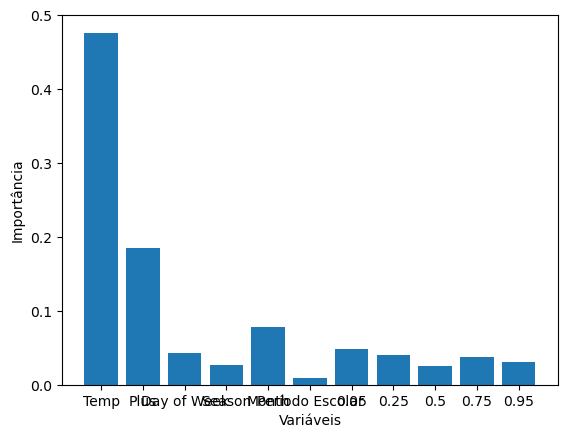

Mean Squared Error: 460.44895989883935
R-squared (R2): -0.46018151461051415
[32.74379946 23.4054857  34.25527451 29.6664908  34.10746578 29.57488629
 13.11486058 42.13505179 30.56010643 19.70251727 38.45578378 32.38535808
 42.13505179 44.16040954 40.47366769 25.53187715 17.29633338 24.98190261
 29.13054379 44.16040954 20.97862665 37.38456276 21.54692485 19.70251727]


C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Features e TARGET_VARIABLE
X = X[['Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar', 0.05, 0.25, 0.5, 0.75, 0.95]]
print(X)
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Obtenha a importância das características
importancia_caracteristicas = model.feature_importances_

# Exiba a importância das características
for nome_variavel, importancia in zip(X.columns, importancia_caracteristicas):
    print(f'{nome_variavel}: {importancia}')

# Exiba um gráfico de barras para visualizar a importância das características
plt.bar(X.columns.astype(str), importancia_caracteristicas)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

      Temp  Plus  Day of Week  Season  Month  Período Escolar        Q5  \
0    18.25  0.00            3       2      5                2  1.796581   
1    21.50  0.00            3       2      5                2  1.796581   
4    18.00  0.00            3       2      5                2  1.796581   
8    20.00  0.05            3       2      4                2  1.796581   
9    20.25  0.00            3       2      4                2  1.796581   
..     ...   ...          ...     ...    ...              ...       ...   
109  20.00  0.00            4       3      7                1  0.152000   
19   20.75  0.23            6       2      3                2  0.013333   
20   20.25  0.45            6       2      3                2  0.013333   
93   13.00  0.20            6       4      9                2  0.013333   
81   13.75  0.00            7       4     10                2  0.040000   

           Q25        Q50        Q75        Q95  
0    11.879839  27.610484  41.166129  46.153710  

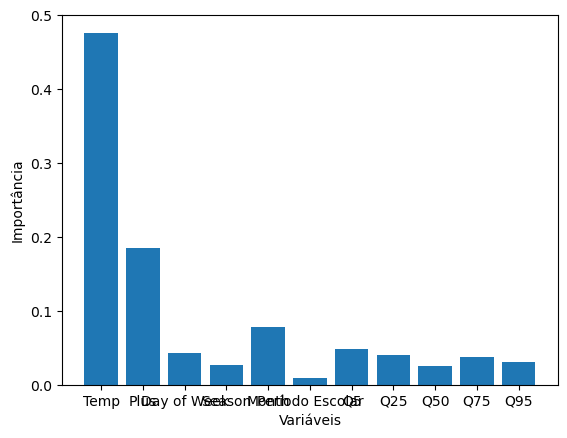

Mean Squared Error: 460.44895989883935
R-squared (R2): -0.46018151461051415
[32.74379946 23.4054857  34.25527451 29.6664908  34.10746578 29.57488629
 13.11486058 42.13505179 30.56010643 19.70251727 38.45578378 32.38535808
 42.13505179 44.16040954 40.47366769 25.53187715 17.29633338 24.98190261
 29.13054379 44.16040954 20.97862665 37.38456276 21.54692485 19.70251727]


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features e TARGET_VARIABLE
X = X[['Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar', 'Q5', 'Q25', 'Q50', 'Q75', 'Q95']]
print(X)
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Obtenha a importância das características
importancia_caracteristicas = model.feature_importances_

# Exiba a importância das características
for nome_variavel, importancia in zip(X.columns, importancia_caracteristicas):
    print(f'{nome_variavel}: {importancia}')

# Exiba um gráfico de barras para visualizar a importância das características
plt.bar(X.columns.astype(str), importancia_caracteristicas)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features e TARGET_VARIABLE
X = X[['Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar', 0.05, 0.25, 0.5, 0.75, 0.95]]
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsoes no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(predictions)

Mean Squared Error (MSE): 368.5898875
R-squared (R2): -0.1688768725161487
[25.90625 23.6875  29.09375 27.65625 25.53125 31.71875 22.8125  25.65625
 30.09375 26.15625 32.96875 29.0625  25.65625 34.78125 17.3125  25.5
 27.0625  24.84375 22.71875 34.5     25.8125  29.90625 39.90625 26.15625]


C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features e TARGET_VARIABLE
#X = EV[['Temp', 'Plus', 'Day of Week', 'Month',  'Season', 'Período Escolar', 'Cluster' ]]
#y = EV['Total Energy (kWh)']

# Features e TARGET_VARIABLE
X = X[['Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar', 0.05, 0.25, 0.5, 0.75, 0.95]]
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino modelo de XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

Mean Squared Error: 454.5441739867434
R-squared (R2): -0.44145618349353355
[33.58667  22.21516  30.549648 34.422474 30.795717 32.415554 17.153112
 40.51389  27.689886 32.26999  38.92928  35.22467  40.51389  40.35726
 36.080765 31.17712  18.891401 24.54161  36.607746 40.35726  21.511164
 38.547802 16.536226 32.26999 ]


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features e TARGET_VARIABLE
#X = EV[['Temp', 'Plus', 'Day of Week', 'Month',  'Season', 'Período Escolar', 'Cluster' ]]
#y = EV['Total Energy (kWh)']

# Features e TARGET_VARIABLE
X = X[['Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar', 0.05, 0.25, 0.5, 0.75, 0.95]]
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualização das previsões em comparação com os valores reais
print(predictions)

C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


Mean Squared Error: 322.9670588844899
R-squared (R2): -0.02419718640447366
[29.50629333 19.66924    27.71281333 23.04719    30.18378524 29.6729
 23.16113333 39.62379    29.65674    27.62403857 34.2577     35.2148
 39.62379    35.6481     27.44887833 36.33108    29.26898333 28.34386667
 16.9075     36.4953     21.61209333 34.7873     20.16642667 27.62403857]


C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [13]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Seleção de características e variável de resposta
#X = EV[['Temp', 'Plus', 'Day of Week', 'Month', 'Season', 'Período Escolar', 'Cluster']]
#y = EV['Total Energy (kWh)']

# Features e TARGET_VARIABLE
X = X[['Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar', 0.05, 0.25, 0.5, 0.75, 0.95]]
y = EV['Total Energy (kWh)'] 

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados (é uma boa prática para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construção do modelo de rede neural
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Camada de saída para uma tarefa de regressão
])

# Compilação do modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# previsões no conjunto de teste
predictions = model.predict(X_test_scaled).flatten()

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2}')
print(predictions)

C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


Epoch 1/100
3/3 - 1s - loss: 915.2241 - val_loss: 1349.7894 - 1s/epoch - 353ms/step
Epoch 2/100
3/3 - 0s - loss: 897.4271 - val_loss: 1326.1580 - 50ms/epoch - 17ms/step
Epoch 3/100
3/3 - 0s - loss: 879.6814 - val_loss: 1303.7448 - 59ms/epoch - 20ms/step
Epoch 4/100
3/3 - 0s - loss: 863.4882 - val_loss: 1280.8564 - 54ms/epoch - 18ms/step
Epoch 5/100
3/3 - 0s - loss: 846.0768 - val_loss: 1256.8969 - 56ms/epoch - 19ms/step
Epoch 6/100
3/3 - 0s - loss: 827.5088 - val_loss: 1231.1760 - 44ms/epoch - 15ms/step
Epoch 7/100
3/3 - 0s - loss: 807.8117 - val_loss: 1202.4141 - 46ms/epoch - 15ms/step
Epoch 8/100
3/3 - 0s - loss: 786.2660 - val_loss: 1170.5001 - 45ms/epoch - 15ms/step
Epoch 9/100
3/3 - 0s - loss: 763.2721 - val_loss: 1136.0355 - 35ms/epoch - 12ms/step
Epoch 10/100
3/3 - 0s - loss: 736.5721 - val_loss: 1098.4026 - 44ms/epoch - 15ms/step
Epoch 11/100
3/3 - 0s - loss: 708.5371 - val_loss: 1057.2283 - 43ms/epoch - 14ms/step
Epoch 12/100
3/3 - 0s - loss: 678.6270 - val_loss: 1012.1395 - 4

Epoch 98/100
3/3 - 0s - loss: 219.6744 - val_loss: 383.1416 - 46ms/epoch - 15ms/step
Epoch 99/100
3/3 - 0s - loss: 219.4440 - val_loss: 384.3590 - 47ms/epoch - 16ms/step
Epoch 100/100
3/3 - 0s - loss: 218.6333 - val_loss: 384.9207 - 62ms/epoch - 21ms/step
Mean Squared Error: 376.15366209290113
R-squared (R2): -0.19286320933763146
[22.852396 17.805864 36.92363  23.837574 19.420403 26.619843 17.4928
 33.2198   30.558441 20.985214 34.04771  23.62393  33.2198   27.33242
 18.361635 18.42478  40.954594 17.275358 23.0287   27.064419 23.683498
 32.649475 33.623806 20.985214]


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features e TARGET_VARIABLE
X = X[['Temp', 'Plus','Day of Week', 'Season', 'Month', 'Período Escolar', 0.05, 0.25, 0.5, 0.75, 0.95]]
y = EV['Total Energy (kWh)']

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treino do modelo KNN para regressão
knn_model = KNeighborsRegressor(n_neighbors=5)  # Você pode ajustar o número de vizinhos conforme necessário
knn_model.fit(X_train, y_train)

# Previsões no conjunto de teste
predictions = knn_model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(predictions)

Mean Squared Error (MSE): 272.39573804
R-squared (R2): 0.1361752203065436
[23.198  12.2558 38.996  23.198  25.1238 20.156  27.12   30.562  24.796
 25.1238 16.058  30.596  30.562  33.496  30.936  24.256  31.746  27.12
 21.334  33.496  22.476  36.858  20.932  25.1238]


C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


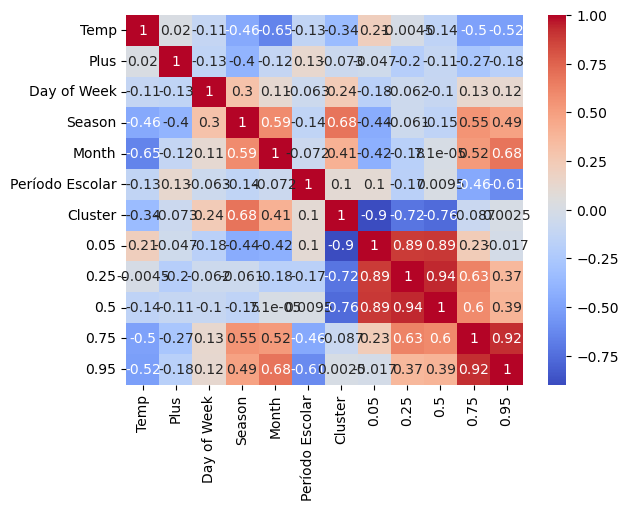

In [40]:
# Criar uma matriz de correlação incluindo os clusters
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()